<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 2</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm NN</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [32]:
from collections import deque
import random
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from operator import itemgetter

Kolejne litery alfabetu będą reprezentowały losowe wierzchołki o współrzędnych ze zbioru [-100,100] x [0,50] x [-100,100]


In [33]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [34]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [35]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [0, 50], zRange = [-100,100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        z = random.randint(zRange[0], zRange[1])
        points[alphabet[i]] = [x,y,z]
    return points


Losujemy n wierzchołków


In [36]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(10) #n = 10
graph, points = all

In [37]:
for point, coords in points.items():
   x, y, z = coords
   print(f"{point}: ({x}, {y}, {z})")

A: (85, 22, -4)
B: (10, 32, -16)
C: (-34, 19, 83)
D: (30, 27, 22)
E: (24, 2, 12)
F: (-65, 33, -76)
G: (-70, 30, 19)
H: (-5, 3, 74)
I: (98, 21, 3)
J: (89, 8, 54)


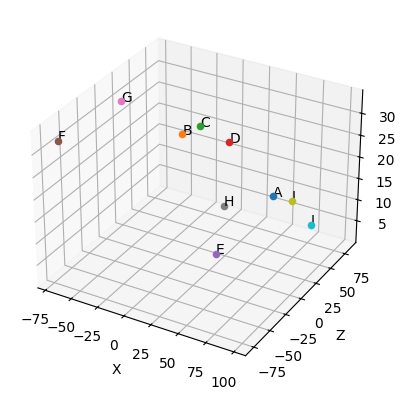

{'A': [85, 22, -4],
 'B': [10, 32, -16],
 'C': [-34, 19, 83],
 'D': [30, 27, 22],
 'E': [24, 2, 12],
 'F': [-65, 33, -76],
 'G': [-70, 30, 19],
 'H': [-5, 3, 74],
 'I': [98, 21, 3],
 'J': [89, 8, 54]}

In [38]:
def plot3D(points):
    labels = points.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)


    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    plt.show()

plot3D(points)
points

In [39]:
display(Markdown(r"Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem"))
display(Markdown(r"$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$"))


Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem

$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$

In [40]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2+(P[2]-Q[2])**2)**(1/2)

#przykład
print(distance(points["A"],points["C"]))

147.44151382836517


Odległości między wierzchołkami możemy przechowywać w słowniku krawędzi

In [41]:
def distances(points):
    distance_dict = {}
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                distance_dict[(node1,node2)] = distance(points[node1],points[node2])
    return distance_dict

distances_dict = distances(points)
distances_dict

{('A', 'B'): 76.60939890117922,
 ('A', 'C'): 147.44151382836517,
 ('A', 'D'): 61.04096984812741,
 ('A', 'E'): 66.15889962809237,
 ('A', 'F'): 166.74831333479807,
 ('A', 'G'): 156.90124282490564,
 ('A', 'H'): 120.60265337047937,
 ('A', 'I'): 14.798648586948742,
 ('A', 'J'): 59.799665550904216,
 ('B', 'A'): 76.60939890117922,
 ('B', 'C'): 109.1146186356347,
 ('B', 'D'): 43.23193264243457,
 ('B', 'E'): 43.3589667773576,
 ('B', 'F'): 96.05206921248495,
 ('B', 'G'): 87.34414691323055,
 ('B', 'H'): 95.73922915921143,
 ('B', 'I'): 90.69729874698585,
 ('B', 'J'): 108.2450922675019,
 ('C', 'A'): 147.44151382836517,
 ('C', 'B'): 109.1146186356347,
 ('C', 'D'): 88.77499647986475,
 ('C', 'E'): 93.24162160752032,
 ('C', 'F'): 162.5976629598347,
 ('C', 'G'): 74.24957912338628,
 ('C', 'H'): 34.322004603461025,
 ('C', 'I'): 154.36320805165977,
 ('C', 'J'): 126.85030547854427,
 ('D', 'A'): 61.04096984812741,
 ('D', 'B'): 43.23193264243457,
 ('D', 'C'): 88.77499647986475,
 ('D', 'E'): 27.586228448267445

Funkcja sumująca odległość na całej ścieżce.

In [42]:
def get_path_length(path, dist_dict):
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)]
    return d
      

#przykład
samplePath = ["A", "D", "C", "B"]
print(samplePath, " ---> ", get_path_length(samplePath, distances_dict))



['A', 'D', 'C', 'B']  --->  258.93058496362687


In [43]:
def edges(dist_dict):
    graph = {}
    for edge in dist_dict:
        node1, node2 = edge
        if node1 not in graph:
            graph[node1] = [node2]
        else:
            graph[node1].append(node2)
    return graph

graph = edges(distances_dict)
graph

{'A': ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'B': ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'C': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'D': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J'],
 'E': ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J'],
 'F': ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J'],
 'G': ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J'],
 'H': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J'],
 'I': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J'],
 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']}

1. Algorytm zachłanny - znajdowanie ścieżki poszukując najbliższego (nieodwiedzonego) sąsiada.

In [44]:
def nearest_neighbour(graph, dist_dict, starter_node):
    node = starter_node
    path = []
    full_distance = 0
    while len(path) < len(graph):
        path.append(node)
        if(len(path) == len(graph)):
            break
        distance = float('inf')
        next_node = ''
        for neighbour in graph[node]:
            min_dist = dist_dict[(node, neighbour)]
            if neighbour not in path and min_dist < distance:
                distance = min_dist
                next_node = neighbour
        full_distance += distance
        print("nearest unvisited neighbour to", node, "-->", next_node, ". edge distance",
              "(",node,",", next_node,") = ", distance, ", full distance : ", full_distance)
        node = next_node
    dist_to_starter_node = dist_dict[(next_node, starter_node)]
    full_distance += dist_to_starter_node
    print("Going to the start point", "(",next_node,",", starter_node,") = ", dist_to_starter_node, ", full distance : ", full_distance)
    path.append(starter_node)
    return (path, full_distance)
            

NN = nearest_neighbour(graph,distances_dict, 'A')
NN


nearest unvisited neighbour to A --> I . edge distance ( A , I ) =  14.798648586948742 , full distance :  14.798648586948742
nearest unvisited neighbour to I --> J . edge distance ( I , J ) =  53.39475629684998 , full distance :  68.19340488379872
nearest unvisited neighbour to J --> D . edge distance ( J , D ) =  69.75672010638115 , full distance :  137.95012499017986
nearest unvisited neighbour to D --> E . edge distance ( D , E ) =  27.586228448267445 , full distance :  165.5363534384473
nearest unvisited neighbour to E --> B . edge distance ( E , B ) =  43.3589667773576 , full distance :  208.8953202158049
nearest unvisited neighbour to B --> G . edge distance ( B , G ) =  87.34414691323055 , full distance :  296.23946712903546
nearest unvisited neighbour to G --> C . edge distance ( G , C ) =  74.24957912338628 , full distance :  370.48904625242176
nearest unvisited neighbour to C --> H . edge distance ( C , H ) =  34.322004603461025 , full distance :  404.8110508558828
nearest un

(['A', 'I', 'J', 'D', 'E', 'B', 'G', 'C', 'H', 'F', 'A'], 735.8761314422306)

In [45]:
def plot3D_path(path, pointsp, angle):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=angle)
    ax.set_title(f"Angle: {angle}")

    for point, label in zip(pointsp.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for i in range(len(path) - 1):
        point1 = path[i]
        point2 = path[i + 1]
        ax.plot([pointsp[point1][0], pointsp[point2][0]],
                [pointsp[point1][2], pointsp[point2][2]],
                [pointsp[point1][1], pointsp[point2][1]])
    plt.show()


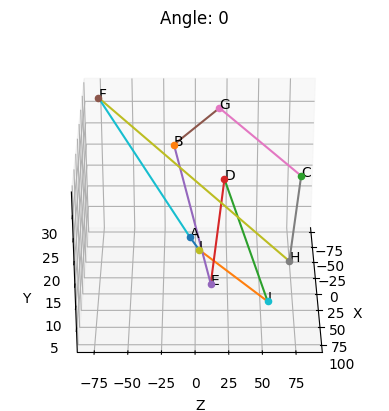

In [46]:
plot3D_path(NN[0], points, 0)

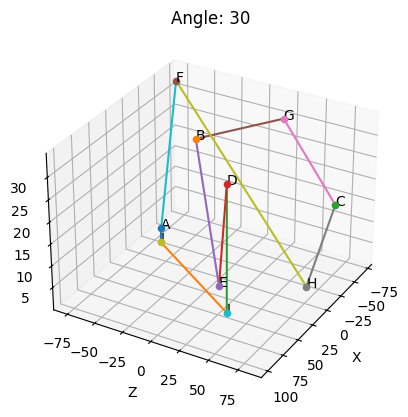

In [47]:
plot3D_path(NN[0], points, 30)

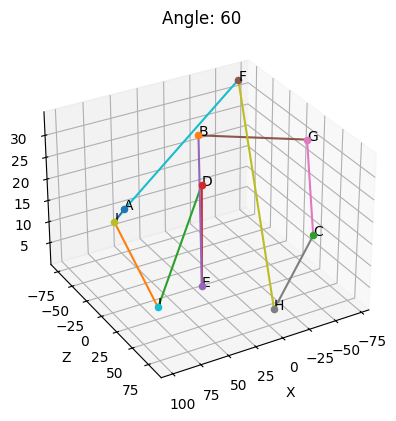

In [48]:
plot3D_path(NN[0], points, 60)

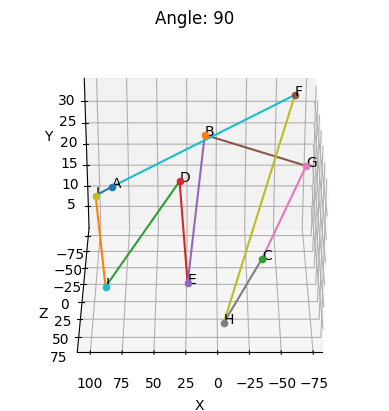

In [49]:
plot3D_path(NN[0], points, 90)

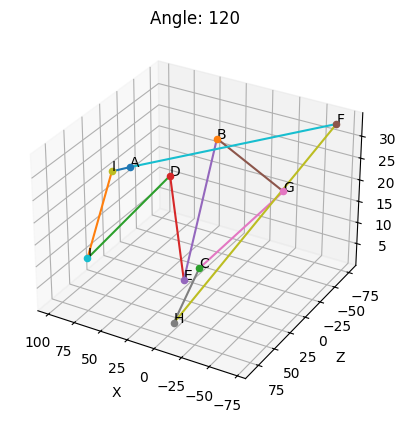

In [50]:
plot3D_path(NN[0], points, 120)

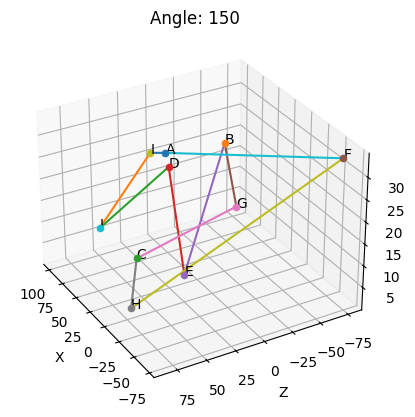

In [51]:
plot3D_path(NN[0], points, 150)

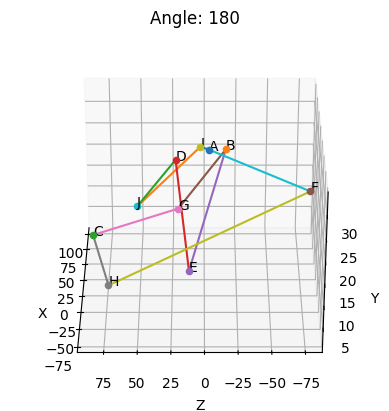

In [52]:
plot3D_path(NN[0], points, 180)

2. Algorytm najkrótszej krawędzi

In [53]:
def plot3D_path_from_edges(edges, pointsp, angle):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=angle)
    ax.set_title(f"Angle: {angle}")

    for point, label in zip(pointsp.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for edge in edges:
        point1 = edge[0]
        point2 = edge[1]
        ax.plot([pointsp[point1][0], pointsp[point2][0]],
                [pointsp[point1][2], pointsp[point2][2]],
                [pointsp[point1][1], pointsp[point2][1]])
    plt.show()

In [54]:
def sorted_edges_by_length_asc(edges):
    edges_sorted = dict(sorted(edges.items(), key=itemgetter(1)))
    edges_queue = [((node1, node2), distance) for (node1, node2), distance in edges_sorted.items()]
    return(edges_queue)

edges_asc = sorted_edges_by_length_asc(distances_dict)
edges_asc

[(('A', 'I'), 14.798648586948742),
 (('I', 'A'), 14.798648586948742),
 (('D', 'E'), 27.586228448267445),
 (('E', 'D'), 27.586228448267445),
 (('C', 'H'), 34.322004603461025),
 (('H', 'C'), 34.322004603461025),
 (('B', 'D'), 43.23193264243457),
 (('D', 'B'), 43.23193264243457),
 (('B', 'E'), 43.3589667773576),
 (('E', 'B'), 43.3589667773576),
 (('I', 'J'), 53.39475629684998),
 (('J', 'I'), 53.39475629684998),
 (('A', 'J'), 59.799665550904216),
 (('J', 'A'), 59.799665550904216),
 (('A', 'D'), 61.04096984812741),
 (('D', 'A'), 61.04096984812741),
 (('A', 'E'), 66.15889962809237),
 (('E', 'A'), 66.15889962809237),
 (('D', 'H'), 67.11929677819934),
 (('H', 'D'), 67.11929677819934),
 (('E', 'H'), 68.45436436049933),
 (('H', 'E'), 68.45436436049933),
 (('D', 'J'), 69.75672010638115),
 (('J', 'D'), 69.75672010638115),
 (('D', 'I'), 70.8590149522275),
 (('I', 'D'), 70.8590149522275),
 (('C', 'G'), 74.24957912338628),
 (('G', 'C'), 74.24957912338628),
 (('A', 'B'), 76.60939890117922),
 (('B', 'A

In [55]:
def get_target(edges, source): 
    for edge in edges:
        if edge[0] == source:
            target = edge[1]
            return (edge, target)
        if edge[1] == source:
            target = edge[0]
            return (edge, target)
    return None


def edges_dict(edges, source):
    journey = {}   
    while edges:
        edge_target = get_target(edges, source)
        if edge_target == None:
            break
        edge = edge_target[0]
        target = edge_target[1]
        edges.remove(edge)
        journey[source] = target
        source = target
    return journey
        
            
def given_edge_makes_cycle(given_edges, candidate_edge):
    edges = given_edges.copy()
    edges.append(candidate_edge)
    source = candidate_edge[0]
    journey = edges_dict(edges, source)
    if list(journey.keys())[0] == list(journey.values())[len(journey.values())-1]:
        return True
    return False

In [56]:
def path_of_shortest_edges(graph, dist_dict):
    edges = []

    queue_edges_asc = sorted_edges_by_length_asc(dist_dict)
    degs_dict = {}
    for edge in graph.keys():
        degs_dict.update({edge: 0})
    while  len(edges) < len(graph):
        edge = queue_edges_asc.pop(0)[0]
        source = edge[0]
        target = edge[1]
        if (degs_dict[source] == 2) or (degs_dict[target] == 2): # nie dołączamy trzeciej krawędzi do jednego wierzchołka
            print("given edge makes third edge from one vertex : ", edge)
            continue
        if (given_edge_makes_cycle(edges, edge) and len(edges) < len(graph)-1):
            print("given edge makes cycle : ", edge)
            continue
        degs_dict[source] += 1
        degs_dict[target] += 1
        edges.append(edge)
        print("ADDING ", edge)
        print(edges)

    length = 0
    for edge in edges:
        length += dist_dict[edge]


    return (edges, length)

edges_path = path_of_shortest_edges(graph, distances_dict)
print(edges_path)
       
    

    

ADDING  ('A', 'I')
[('A', 'I')]
given edge makes cycle :  ('I', 'A')
ADDING  ('D', 'E')
[('A', 'I'), ('D', 'E')]
given edge makes cycle :  ('E', 'D')
ADDING  ('C', 'H')
[('A', 'I'), ('D', 'E'), ('C', 'H')]
given edge makes cycle :  ('H', 'C')
ADDING  ('B', 'D')
[('A', 'I'), ('D', 'E'), ('C', 'H'), ('B', 'D')]
given edge makes third edge from one vertex :  ('D', 'B')
given edge makes cycle :  ('B', 'E')
given edge makes cycle :  ('E', 'B')
ADDING  ('I', 'J')
[('A', 'I'), ('D', 'E'), ('C', 'H'), ('B', 'D'), ('I', 'J')]
given edge makes third edge from one vertex :  ('J', 'I')
given edge makes cycle :  ('A', 'J')
given edge makes cycle :  ('J', 'A')
given edge makes third edge from one vertex :  ('A', 'D')
given edge makes third edge from one vertex :  ('D', 'A')
ADDING  ('A', 'E')
[('A', 'I'), ('D', 'E'), ('C', 'H'), ('B', 'D'), ('I', 'J'), ('A', 'E')]
given edge makes third edge from one vertex :  ('E', 'A')
given edge makes third edge from one vertex :  ('D', 'H')
given edge makes thir

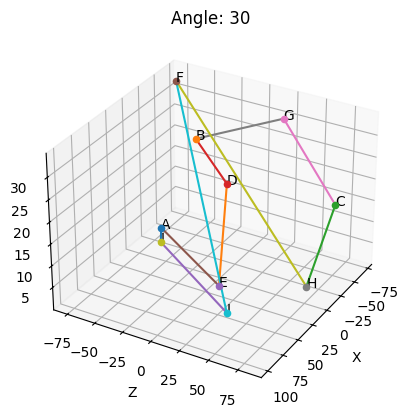

In [57]:
plot3D_path_from_edges(edges_path[0], points, 30)


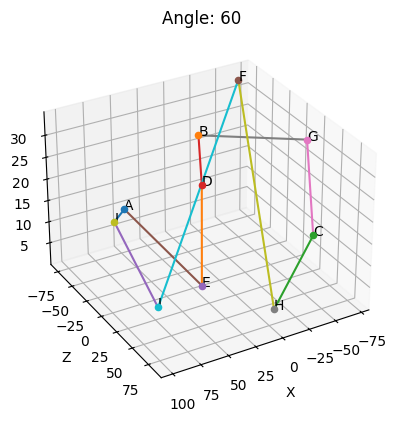

In [58]:
plot3D_path_from_edges(edges_path[0], points, 60)


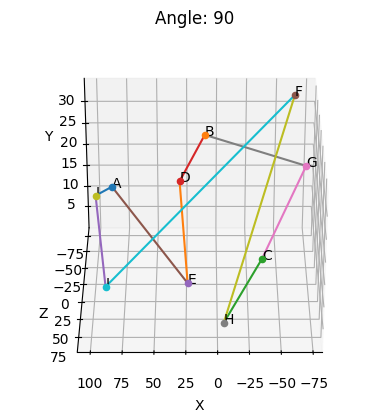

In [59]:
plot3D_path_from_edges(edges_path[0], points, 90)


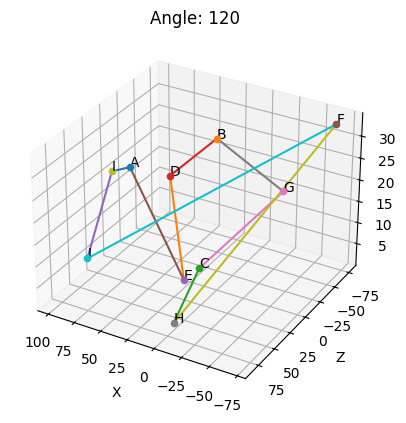

In [60]:
plot3D_path_from_edges(edges_path[0], points, 120)


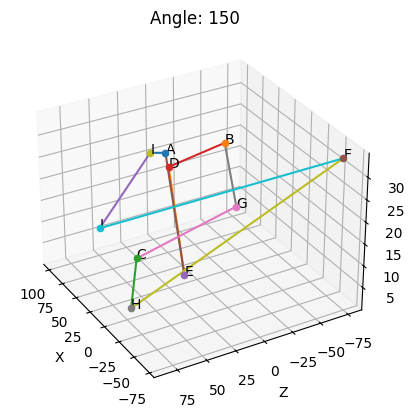

In [61]:
plot3D_path_from_edges(edges_path[0], points, 150)


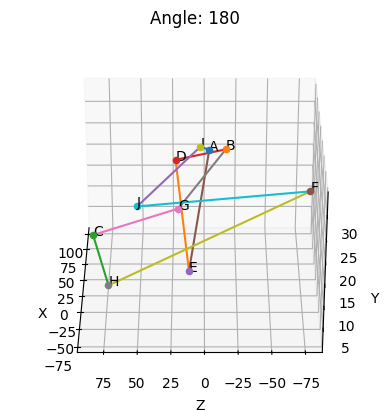

In [62]:
plot3D_path_from_edges(edges_path[0], points, 180)
